# <div style="text-align: center; margin-top:2em; margin-bottom:1em">ESTADÍSTICA PARA INGENIERÍA Y CIENCIAS</div>
## <div style="text-align: center; margin-bottom:1em">PRÁCTICA 5: Estadística no paramétrica</div>
## <div style="text-align: center; margin-bottom:1em">Ivan Svetlich</div>

***
<br></br>

In [35]:
#Librerias
library(IRdisplay)
library(formattable)
library(ggplot2)
library(cowplot)
library(dplyr)
library(stringr)

<br></br>

### **Ejercicio 1**

#### <div style="text-align: justify">Los siguientes datos representan el tiempo, en minutos, que un paciente tiene que esperar durante 12 visitas al consultorio de una doctora antes de ser atendido por ésta:</div>

<table style="width: 70%">
    <tbody>
        <tr>
            <td style="text-align: center; vertical-align: middle; font-weight: bold; width:20%;">Tiempo [min]</td>
            <td style="text-align: center; vertical-align: middle;">17</td>
            <td style="text-align: center; vertical-align: middle;">15</td>
            <td style="text-align: center; vertical-align: middle;">20</td>
            <td style="text-align: center; vertical-align: middle;">20</td>
            <td style="text-align: center; vertical-align: middle;">32</td>
            <td style="text-align: center; vertical-align: middle;">28</td>
            <td style="text-align: center; vertical-align: middle;">12</td>
            <td style="text-align: center; vertical-align: middle;">26</td>
            <td style="text-align: center; vertical-align: middle;">25</td>
            <td style="text-align: center; vertical-align: middle;">25</td>
            <td style="text-align: center; vertical-align: middle;">35</td>
            <td style="text-align: center; vertical-align: middle;">24</td>
        </tr>
    </tbody>
</table>

#### <div style="text-align: justify">Utilice la prueba del signo al nivel de significancia de 0.05 para probar la afirmación de la doctora, de que la media del tiempo de espera para sus pacientes no es mayor que 20 minutos antes de entrar al consultorio.</div>

In [2]:
data_1 <- read.csv("./TP5_tables/data1.csv") # Leo los datos desde archivo .csv


<div style="text-align: justify">Las hipótesis son:</div>

#### <div style="text-align: center">$$H_0\text{: }\mu = 20\text{ y }H_1\text{: }\mu > 20$$</div>

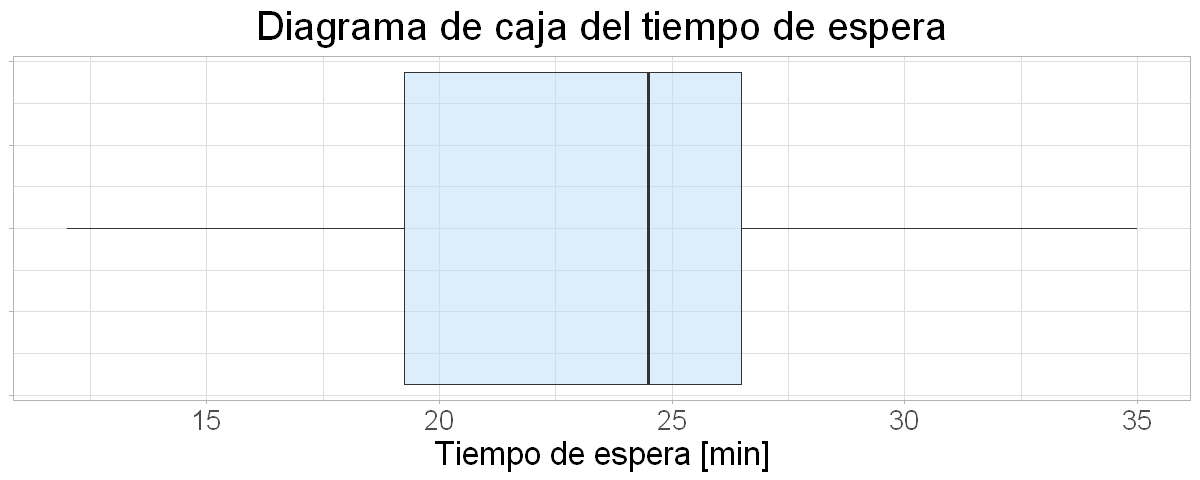

In [377]:
# Plot
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data_1, aes(x=wait_time)) +
    labs(
        title="Diagrama de caja del tiempo de espera",
        x="Tiempo de espera [min]") +
    geom_boxplot(alpha=0.5, fill="#baddf7") +
    theme_light() +
    theme(text=element_text(size=20),
         plot.title = element_text(size=24, hjust = 0.5),
         axis.text.y = element_blank())


In [3]:
mu0 <- 20
wait_time <- data_1$wait_time
wait_time.filtered <- wait_time[which(data_1$wait_time != mu0)] # filtro los valores iguales as la media 


In [4]:
n <- length(wait_time.filtered)
magnitud_normalizada <- wait_time.filtered - mu0
x <- sum(magnitud_normalizada > 0)
p <- 0.5
X_binom <- dbinom(x, n, p)


In [5]:
display_markdown(sprintf('Para $n = %d$ y $p = %.2f$, la probabilidad de $X \\geq %d$ es %.4f', 
                         n, p, x, X_binom))


Para $n = 10$ y $p = 0.50$, la probabilidad de $X \geq 7$ es 0.1172

<div style="text-align: justify">Como $0.1172$ es mayor que el nivel de significancia $\alpha = 0.05$, la hipótesis nula no es rechazada y se concluye que la media del tiempo de espera no es mayor a $20$ minutos.</div>

***
<br></br>

### **Ejercicio 2**

#### <div style="text-align: justify">Analice los datos del ejercicio anterior usando la prueba de rango con signo.</div>

In [6]:
df1 <- data.frame(data_1)
mu0 <- 20
df1 <- df1 %>% filter(wait_time != mu0) %>% arrange(abs(wait_time - mu0))


In [7]:
magnitud_normalizada <- df1$wait_time - mu0
magnitud_absoluta <- sort(abs(df1$wait_time - mu0))
rango <- rank(abs(magnitud_normalizada))
rango_con_signo <- rango*ifelse(magnitud_normalizada < 0, -1, 1)


In [8]:
display_markdown('#### **Rangos con signo**')
display_markdown('\n')
rangos_con_signo <- data.frame(magnitud_normalizada, magnitud_absoluta, rango, rango_con_signo)
colnames(rangos_con_signo) <- c('Valor normalizado', 'Magnitud absoluta', 'Rango', 'Rango con signo')
table <- formattable(rangos_con_signo, align='c')
as.htmlwidget(table, width="70%", height=NULL)


#### **Rangos con signo**

HTML widgets cannot be represented in plain text (need html)

In [9]:
s_plus <- sum(rango_con_signo[which(rango_con_signo > 0)]) # Sumo los rangos positivos
display_markdown(sprintf('Valor de estadístico de prueba: $$s_{+} = %.2f$$', s_plus))


Valor de estadístico de prueba: $$s_{+} = 42.50$$

In [10]:
alpha <- 0.05
c1 <- qsignrank(alpha, length(data_1$wait_time), lower=FALSE) # calculo la región de rechazo para alpha=0.05
display_markdown(sprintf('Región de rechazo para prueba de nivel $\\alpha = %.2f$: $$s_{+} \\geq c_{1} = %d$$', alpha, c1))


Región de rechazo para prueba de nivel $\alpha = 0.05$: $$s_{+} \geq c_{1} = 60$$

<div style="text-align: justify">Como el valor del estadístico de prueba se encuentra fuera de la zona de rechazo, no es posible rechazar la hipótesis nula con un nivel de significancia $0.05$ y se concluye que la media del tiempo de espera no es mayor a $20$ minutos. Este resultado coincide con el obtenido en el inciso anterior, utilizando la prueba del signo.</div>

<div style="text-align: justify">Utilizando la funcion <i><b>wilcox.test</b></i>:</div>

In [11]:
wilcox.test(data_1$wait_time,
            alternative = "greater",
            exact = FALSE,
            mu = mu0)


	Wilcoxon signed rank test with continuity correction

data:  data_1$wait_time
V = 42.5, p-value = 0.06906
alternative hypothesis: true location is greater than 20


<div style="text-align: justify">Como el p-valor de la prueba es mayor a $0.05$, no es posible rechazar la hipótesis nula.</div>

***
<br></br>

### **Ejercicio 3**

#### <div style="text-align: justify">Los pesos de 5 personas antes de que dejen de fumar y cinco semanas después de dejar de fumar, en kg, son los siguientes:</div>

<table style="width: 50%">
    <thead>
        <tr style="font-size: larger">
            <th style="text-align: center; width: 40%"></th>
            <th colspan="5">Individuo</th>
        </tr>
        <tr style="font-size: larger">
            <th style="text-align: center"></th>
            <td style="text-align: center;">1</td>
            <td style="text-align: center;">2</td>
            <td style="text-align: center;">3</td>
            <td style="text-align: center;">4</td>
            <td style="text-align: center;">5</td>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style="text-align: center; vertical-align: middle; font-weight: bold; font-size: larger;">Antes</td>
            <td style="text-align: center; vertical-align: middle;">66</td>
            <td style="text-align: center; vertical-align: middle;">80</td>
            <td style="text-align: center; vertical-align: middle;">69</td>
            <td style="text-align: center; vertical-align: middle;">52</td>
            <td style="text-align: center; vertical-align: middle;">75</td>
        </tr>
        <tr>
            <td style="text-align: center; vertical-align: middle; font-weight: bold; font-size: larger;">Después</td>
            <td style="text-align: center; vertical-align: middle;">71</td>
            <td style="text-align: center; vertical-align: middle;">82</td>
            <td style="text-align: center; vertical-align: middle;">68</td>
            <td style="text-align: center; vertical-align: middle;">56</td>
            <td style="text-align: center; vertical-align: middle;">73</td>
        </tr>
    </tbody>
</table>

#### <div style="text-align: justify">Utilice la prueba de rango con signo para observaciones pareadas para probar la hipótesis, en el nivel de significancia de $0.05$, de que dejar de fumar no tiene efecto en el peso de una persona, contra la alternativa de que el peso aumenta si se deja de fumar.</div>


In [12]:
data_3 <- read.csv("./TP5_tables/data3.csv") # Leo los datos desde archivo .csv


<div style="text-align: justify">Las hipótesis son:</div>

#### <div style="text-align: center">$$H_0\text{: }\mu_D = 0\text{ y }H_1\text{: }\mu_D > 0$$</div>

<div style="text-align: justify">siendo $\mu_D$ la media de la diferencia de peso:</div>

#### <div style="text-align: center">$$D = X_{\text{después}} - X_{\text{antes}}$$</div>

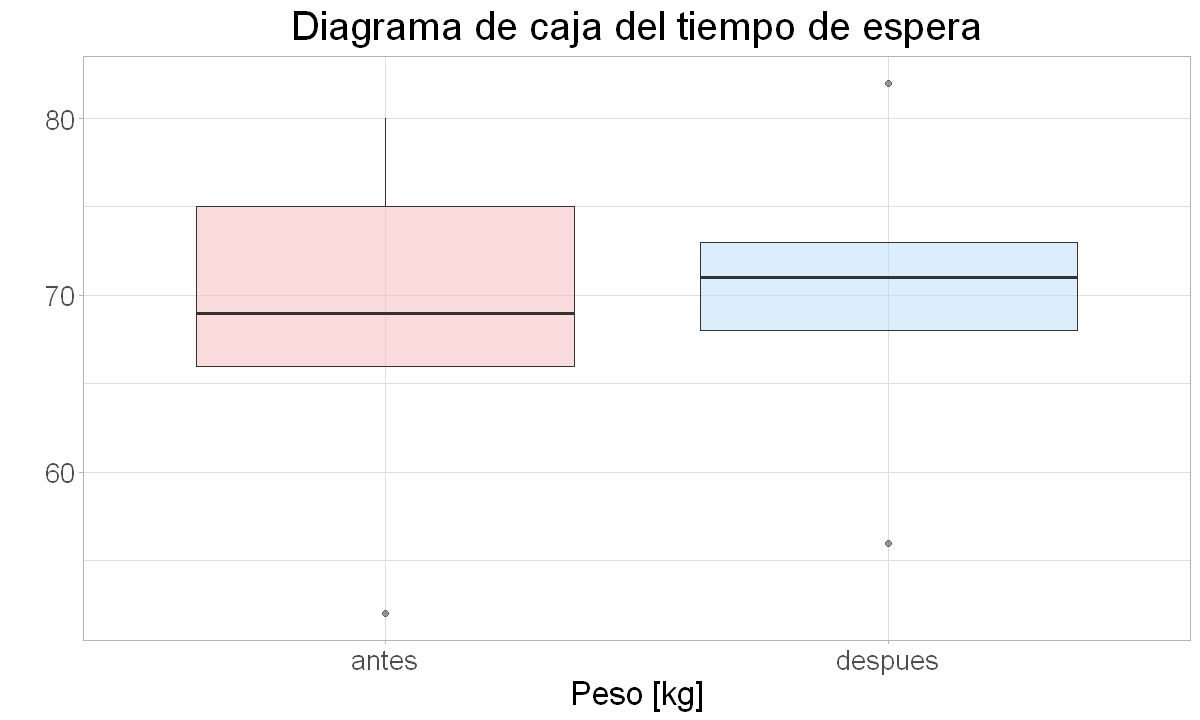

In [375]:
# Plot
options(repr.plot.width=10, repr.plot.height=6)
data_3 %>% melt(id.var=NULL,
  variable.name = "antes_despues", 
  value.name = "peso") %>% 
ggplot(aes(y=peso, x=antes_despues)) +
    labs(
        title="Diagrama de caja del tiempo de espera",
        x="Peso [kg]",
        y="") +
    geom_boxplot(alpha=0.5, fill=c("#f7baba","#baddf7")) +
    theme_light() +
    theme(text=element_text(size=20),
         plot.title = element_text(size=24, hjust = 0.5))



In [13]:
df3 <- data.frame(1:nrow(data_3), data_3$antes, data_3$despues, data_3$despues - data_3$antes)
colnames(df3) <- c("individuo", "antes", "despues", "diferencia")
df3 <- df3 %>% arrange(abs(diferencia))
rango <- rank(abs(df3$diferencia))
rango_con_signo <- rango*ifelse(df3$diferencia < 0, -1, 1)
df3 <- data.frame(df3, rango_con_signo)


In [14]:
display_markdown('#### **Rangos con signo**')
display_markdown('\n')
table <- formattable(df3, align='c')
as.htmlwidget(table, width="50%", height=NULL)


#### **Rangos con signo**

HTML widgets cannot be represented in plain text (need html)

In [15]:
s_plus <- sum(rango_con_signo[which(rango_con_signo > 0)]) # Sumo los rangos positivos
display_markdown(sprintf('Valor de estadístico de prueba: $$s_{+} = %.2f$$', s_plus))


Valor de estadístico de prueba: $$s_{+} = 11.50$$

In [16]:
alpha <- 0.05
c1 <- qsignrank(alpha, length(df3$diferencia), lower=FALSE) # calculo la región de rechazo para alpha=0.05
display_markdown(sprintf('Región de rechazo para prueba de nivel $\\alpha = %.2f$: $$s_{+} \\geq c_{1} = %d$$', alpha, c1))


Región de rechazo para prueba de nivel $\alpha = 0.05$: $$s_{+} \geq c_{1} = 14$$

<div style="text-align: justify">Como el valor del estadístico de prueba se encuentra fuera de la zona de rechazo, no es posible rechazar la hipótesis nula con un nivel de significancia $0.05$ y se concluye que dejar de fumar no tiene efecto en el peso de la persona.</div>

<div style="text-align: justify">Utilizando la funcion <i><b>wilcox.test</b></i>:</div>

In [17]:
wilcox.test(x = data_3$antes, y = data_3$despues,
            alternative = "greater")


	Wilcoxon rank sum exact test

data:  data_3$antes and data_3$despues
W = 11, p-value = 0.6548
alternative hypothesis: true location shift is greater than 0


<div style="text-align: justify">Como el p-valor de la prueba es mayor a $0.05$, no es posible rechazar la hipótesis nula.</div>

***
<br></br>

### **Ejercicio 4**

#### <div style="text-align: justify">Los siguientes son los números de recetas surtidas por dos farmacias A y B en un período de 20 días:</div>

<table style="width: 100%">
    <thead>
        <tr style="font-size: larger">
            <th style="text-align: center; width: 40%">día</th>
            <th style="text-align: center; width: 40%">1</th>
            <th style="text-align: center; width: 40%">2</th>
            <th style="text-align: center; width: 40%">3</th>
            <th style="text-align: center; width: 40%">4</th>
            <th style="text-align: center; width: 40%">5</th>
            <th style="text-align: center; width: 40%">6</th>
            <th style="text-align: center; width: 40%">7</th>
            <th style="text-align: center; width: 40%">8</th>
            <th style="text-align: center; width: 40%">9</th>
            <th style="text-align: center; width: 40%">10</th>
            <th style="text-align: center; width: 40%">11</th>
            <th style="text-align: center; width: 40%">12</th>
            <th style="text-align: center; width: 40%">13</th>
            <th style="text-align: center; width: 40%">14</th>
            <th style="text-align: center; width: 40%">15</th>
            <th style="text-align: center; width: 40%">16</th>
            <th style="text-align: center; width: 40%">17</th>
            <th style="text-align: center; width: 40%">18</th>
            <th style="text-align: center; width: 40%">19</th>
            <th style="text-align: center; width: 40%">20</th>        
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style="text-align: center; vertical-align: middle; font-size: larger; font-weight: bold;">A</td>
            <td style="text-align: center; vertical-align: middle;">19</td>
            <td style="text-align: center; vertical-align: middle;">21</td>
            <td style="text-align: center; vertical-align: middle;">15</td>
            <td style="text-align: center; vertical-align: middle;">17</td>
            <td style="text-align: center; vertical-align: middle;">24</td>
            <td style="text-align: center; vertical-align: middle;">12</td>
            <td style="text-align: center; vertical-align: middle;">19</td>
            <td style="text-align: center; vertical-align: middle;">14</td>
            <td style="text-align: center; vertical-align: middle;">20</td>
            <td style="text-align: center; vertical-align: middle;">18</td>
            <td style="text-align: center; vertical-align: middle;">23</td>
            <td style="text-align: center; vertical-align: middle;">21</td>
            <td style="text-align: center; vertical-align: middle;">17</td>
            <td style="text-align: center; vertical-align: middle;">12</td>
            <td style="text-align: center; vertical-align: middle;">16</td>
            <td style="text-align: center; vertical-align: middle;">15</td>
            <td style="text-align: center; vertical-align: middle;">20</td>
            <td style="text-align: center; vertical-align: middle;">18</td>
            <td style="text-align: center; vertical-align: middle;">14</td>
            <td style="text-align: center; vertical-align: middle;">22</td>
        </tr>
        <tr>
            <td style="text-align: center; vertical-align: middle; font-size: larger; font-weight: bold;">B</td>
            <td style="text-align: center; vertical-align: middle;">17</td>
            <td style="text-align: center; vertical-align: middle;">15</td>
            <td style="text-align: center; vertical-align: middle;">12</td>
            <td style="text-align: center; vertical-align: middle;">12</td>
            <td style="text-align: center; vertical-align: middle;">16</td>
            <td style="text-align: center; vertical-align: middle;">15</td>
            <td style="text-align: center; vertical-align: middle;">11</td>
            <td style="text-align: center; vertical-align: middle;">13</td>
            <td style="text-align: center; vertical-align: middle;">14</td>
            <td style="text-align: center; vertical-align: middle;">21</td>
            <td style="text-align: center; vertical-align: middle;">19</td>
            <td style="text-align: center; vertical-align: middle;">15</td>
            <td style="text-align: center; vertical-align: middle;">11</td>
            <td style="text-align: center; vertical-align: middle;">10</td>
            <td style="text-align: center; vertical-align: middle;">20</td>
            <td style="text-align: center; vertical-align: middle;">12</td>
            <td style="text-align: center; vertical-align: middle;">13</td>
            <td style="text-align: center; vertical-align: middle;">17</td>
            <td style="text-align: center; vertical-align: middle;">16</td>
            <td style="text-align: center; vertical-align: middle;">18</td>
        </tr>
    </tbody>
</table>

#### <div style="text-align: justify">Utilice la prueba de rango con signo al nivel de significancia de 0.01 para determinar si las dos farmacias, en promedio, surten el mismo número de recetas, contra la alternativa de que la farmacia A surte más recetas que la farmacia B.</div>


In [18]:
data_4 <- read.csv("./TP5_tables/data4.csv") # Leo los datos desde archivo .csv


<div style="text-align: justify">Las hipótesis son:</div>

#### <div style="text-align: center">$$H_0\text{: }\mu_D = 0\text{ y }H_1\text{: }\mu_D > 0$$</div>

<div style="text-align: justify">siendo $\mu_D$ la media de la diferencia entre el número de recetas surtidas por la farmacia A y la farmacia B:</div>

#### <div style="text-align: center">$$D = X_A - X_B$$</div>

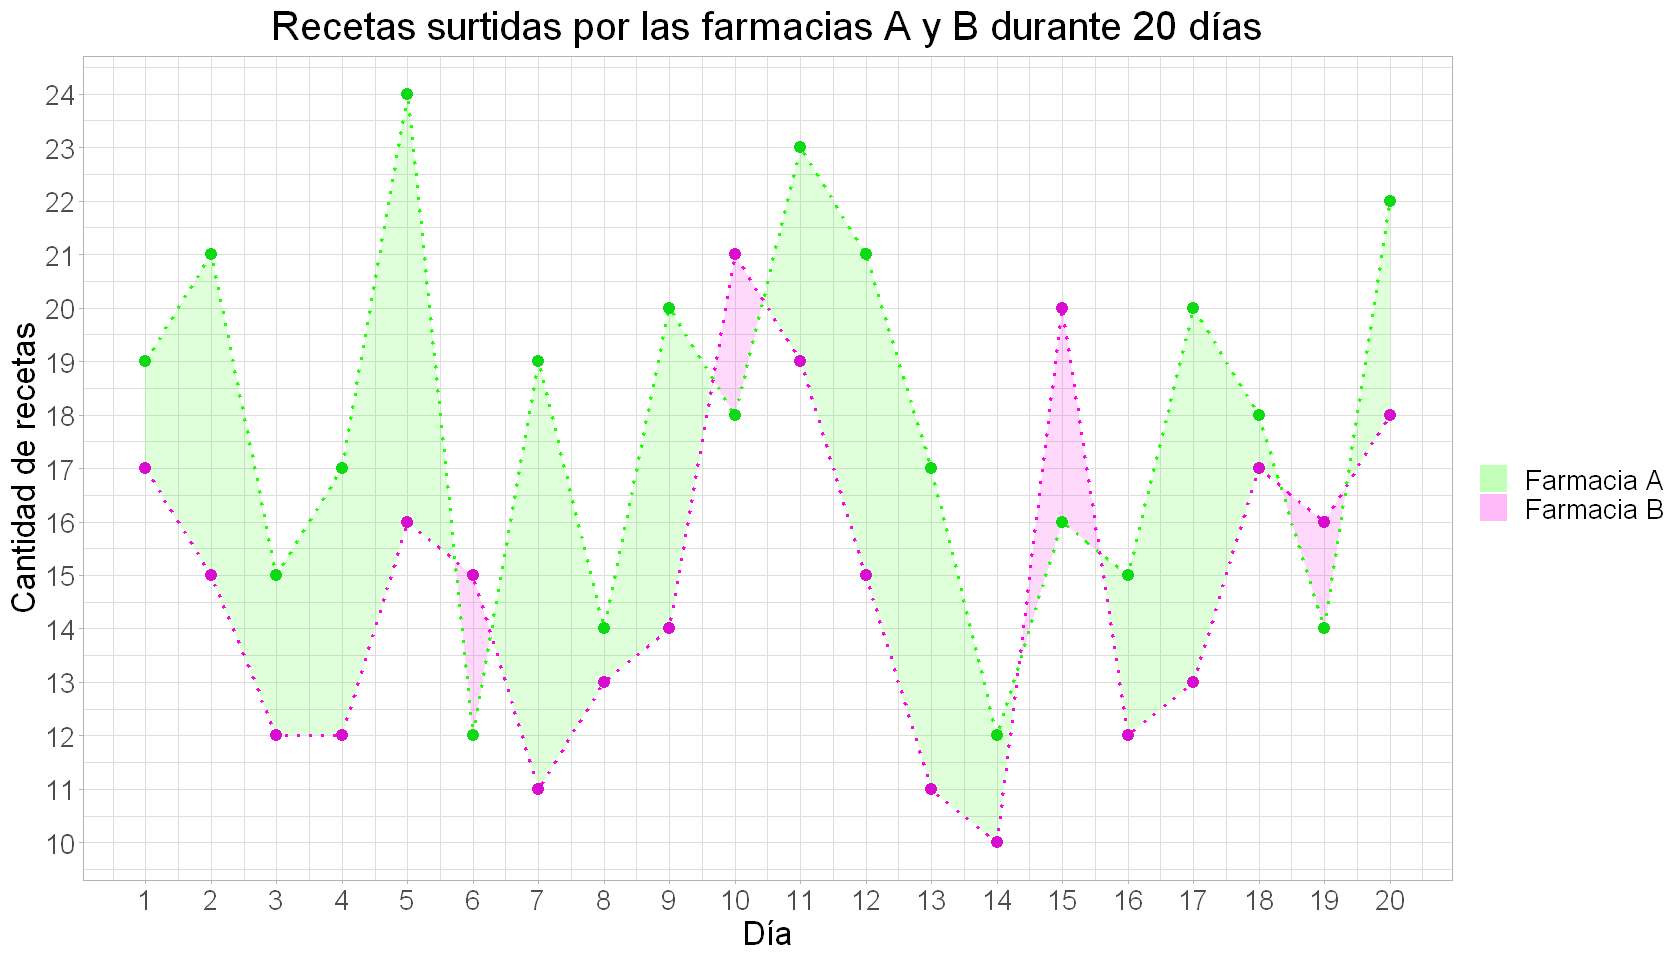

In [367]:
A_approx <- approx(data_4$A, n = 500)
B_approx <- approx(data_4$B, n = 500)
options(repr.plot.width=14, repr.plot.height=8)
data_4.interp <- data_frame(dia=c(A_approx$x, data_4$dia), A=c(A_approx$y, data_4$A), B=c(B_approx$y, data_4$B)) 
data_4.interp %>%
ggplot(aes(x=dia)) +
    labs(
        title="Recetas surtidas por las farmacias A y B durante 20 días",
        x="Día",
        y="Cantidad de recetas",
        fill="",
        size="",
        alpha="",
        color="") + 
    geom_ribbon(aes(ymin=B, ymax = pmin(B, A), fill = "Farmacia B"), alpha=0.15) +
    geom_ribbon(aes(ymin=A, ymax = pmin(A, B), fill = "Farmacia A"), alpha=0.15) + 
    geom_line(alpha=1, aes(y=A), col="#20ff03", linetype = "dotted", size=1) +
    geom_line(alpha=1, aes(y=B), col="#ff03e6", linetype = "dotted", size=1) +
    geom_point(aes(y=A, size=ifelse(A%in%data_4$A & dia%in%data_4$dia, "2","0"), alpha=ifelse(A%in%data_4$A & dia%in%data_4$dia, "2","0")), col="#0dd914", show.legend = F) +
    geom_point(aes(y=B, size=ifelse(B%in%data_4$B & dia%in%data_4$dia, "2","0"), alpha=ifelse(B%in%data_4$B & dia%in%data_4$dia, "2","0")), col="#d90dcf", show.legend = F) +
    scale_fill_manual(values = c("#20ff03", "#ff03e6")) +
    scale_alpha_manual(values =c(0,1)) +
    scale_size_manual(values =c(0,3)) +
    scale_x_continuous(breaks = 1:20) +
    scale_y_continuous(breaks = min(min(round(A_approx$y)), min(round(B_approx$y))) : max(max(round(A_approx$y)), max(round(B_approx$y)))) +
    theme_light() +
    theme(text=element_text(size=20),
         plot.title = element_text(size=24, hjust = 0.5))


In [19]:
df4 <- data.frame(data_4, diferencia = data_4$A - data_4$B)
colnames(df4)[2:3] <- c("farmacia_A", "farmacia_B")
df4 <- df4 %>% arrange(abs(diferencia))
rango <- rank(abs(df4$diferencia))
rango_con_signo <- rango*ifelse(df4$diferencia < 0, -1, 1)
df4 <- data.frame(df4, rango_con_signo)

In [20]:
display_markdown('#### **Rangos con signo para muestras pareadas**')
display_markdown('\n')
table <- formattable(df4, align='c')
as.htmlwidget(table, width="60%", height=NULL)


#### **Rangos con signo para muestras pareadas**

HTML widgets cannot be represented in plain text (need html)

In [21]:
s_plus <- sum(rango_con_signo[which(rango_con_signo > 0)]) # Sumo los rangos positivos
display_markdown(sprintf('Valor de estadístico de prueba: $$s_{+} = %.2f$$', s_plus))


Valor de estadístico de prueba: $$s_{+} = 180.00$$

In [22]:
alpha <- 0.01
c1 <- qsignrank(alpha, length(df4$diferencia), lower=FALSE) # calculo la región de rechazo para alpha=0.05
display_markdown(sprintf('Región de rechazo para prueba de nivel $\\alpha = %.2f$: $$s_{+} \\geq c_{1} = %d$$', alpha, c1))


Región de rechazo para prueba de nivel $\alpha = 0.01$: $$s_{+} \geq c_{1} = 166$$

<div style="text-align: justify">Como el valor del estadístico de prueba se encuentra dentro de la zona de rechazo, se rechaza la hipótesis nula con un nivel de significancia $0.01$ y se concluye que la farmacia A surte más recetas que la farmacia B.</div>

<div style="text-align: justify">Utilizando la funcion <i><b>wilcox.test</b></i>:</div>

In [23]:
diferencia <- data_4$A - data_4$B
wilcox.test(diferencia, alternative = "greater", exact = FALSE)


	Wilcoxon signed rank test with continuity correction

data:  diferencia
V = 180, p-value = 0.002647
alternative hypothesis: true location is greater than 0


<div style="text-align: justify">Como el p-valor de la prueba es menor a $0.01$, se rechaza la hipótesis nula.</div>

***
<br></br>

### **Ejercicio 5**

#### <div style="text-align: justify">Un fabricante de cigarrillos afirma que el contenido de alquitrán de la marca de cigarrillos B es menor que la de la marca A. Para probar esta afirmación, se registran las siguientes determinaciones de contenido de alquitrán, en miligramos:</div>

<table style="width: 50%">
    <thead>
        <tr style="font-size: larger">
            <th style="text-align: center; width: 20%"></th>
            <th colspan="6">Concentración de alquitrán (mg)</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style="text-align: center; vertical-align: middle; font-size: larger; font-weight: bold;">Marca A</td>
            <td style="text-align: center; vertical-align: middle;">1</td>
            <td style="text-align: center; vertical-align: middle;">12</td>
            <td style="text-align: center; vertical-align: middle;">9</td>
            <td style="text-align: center; vertical-align: middle;">13</td>
            <td style="text-align: center; vertical-align: middle;">11</td>
            <td style="text-align: center; vertical-align: middle;">14</td>
        </tr>
        <tr>
            <td style="text-align: center; vertical-align: middle; font-size: larger; font-weight: bold;">Marca B</td>
            <td style="text-align: center; vertical-align: middle;">8</td>
            <td style="text-align: center; vertical-align: middle;">10</td>
            <td style="text-align: center; vertical-align: middle;">7</td>
            <td style="text-align: center; vertical-align: middle;">-</td>
            <td style="text-align: center; vertical-align: middle;">-</td>
            <td style="text-align: center; vertical-align: middle;">-</td>
        </tr>
    </tbody>
</table>

#### <div style="text-align: justify">Utilice la prueba de suma de rangos con $\alpha = 0.05$ para probar si tal afirmación es válida.</div>

In [24]:
data_5 <- read.csv("./TP5_tables/data5.csv") # Leo los datos desde archivo .csv
data_5$marca <- factor(data_5$marca)


<div style="text-align: justify">Las hipótesis son:</div>

#### <div style="text-align: center">$$H_0\text{: }\mu_B - \mu_A = 0\text{ y }H_1\text{: }\mu_B - \mu_A < 0$$</div>

<div style="text-align: justify">donde $\mu_A$ es la media verdadera de alquitrán en la marca A y $\mu_B$ es la media verdadera de alquitrán en la marca B.</div>

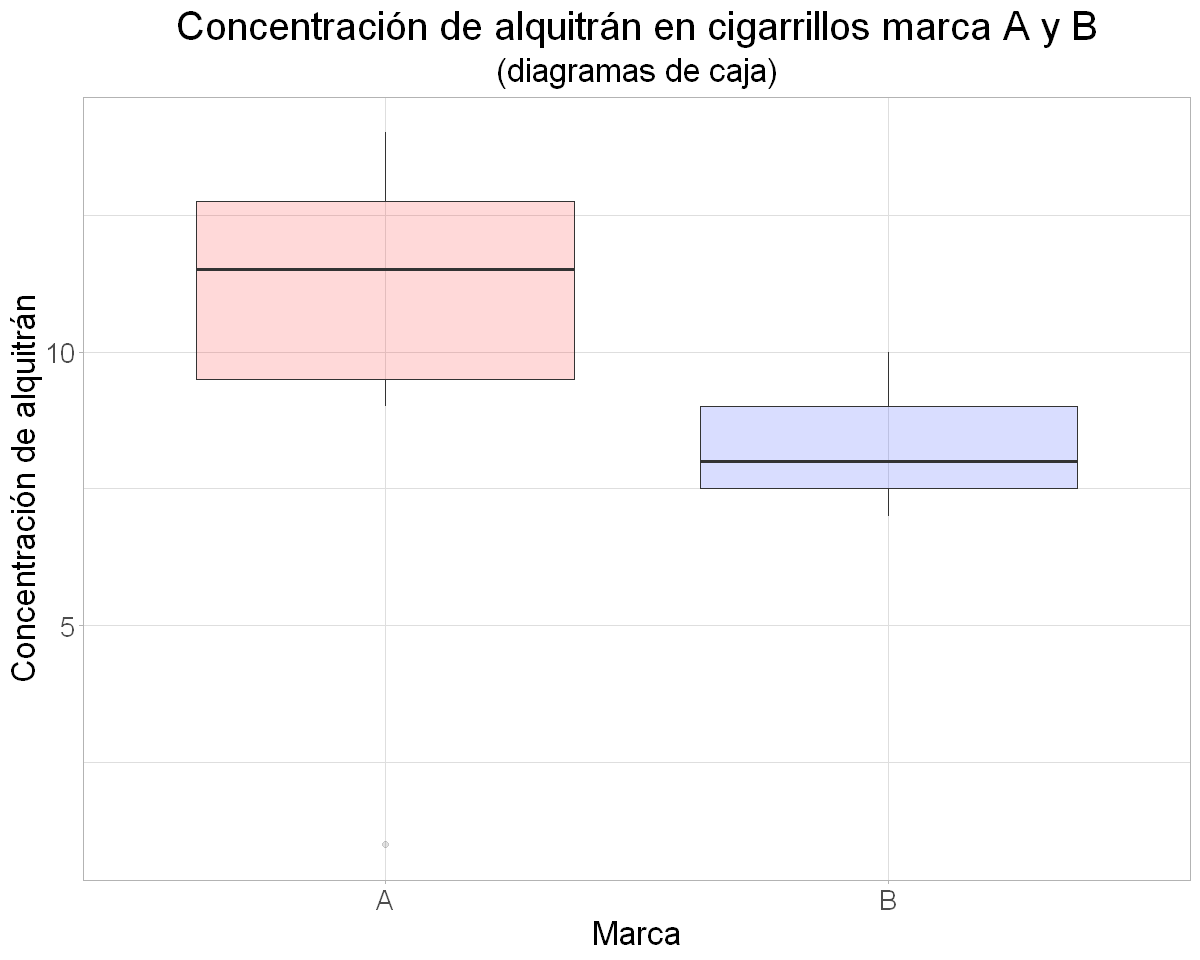

In [376]:
# Plot
options(repr.plot.width=10, repr.plot.height=8)
data_5 %>% 
ggplot(aes(y=concentracion_alquitran, x=marca)) +
    labs(
        title="Concentración de alquitrán en cigarrillos marca A y B",
        subtitle="(diagramas de caja)",
        x="Marca",
        y="Concentración de alquitrán") +
    geom_boxplot(alpha=0.15, fill=c("#ff0303", "#031cff")) +
    theme_light() +
    theme(text=element_text(size=20),
         plot.title = element_text(size=24, hjust = 0.5),
         plot.subtitle = element_text(size=20, hjust = 0.5))


In [38]:
concentracion.A <- data_5[data_5$marca == 'A',]$concentracion_alquitran
concentracion.B <- data_5[data_5$marca == 'B',]$concentracion_alquitran

wilcox.test(concentracion.A,concentracion.B,alternative="greater",paired=FALSE)


	Wilcoxon rank sum exact test

data:  concentracion.A and concentracion.B
W = 14, p-value = 0.131
alternative hypothesis: true location shift is greater than 0


<div style="text-align: justify">Como el p-valor de la prueba es mayor a $0.05$, no hay evidencia suficiente para afirmar que la concentración de alquitrán es mayor en los cigarrillos de la marca A que en los de la marca B.</div>

***
<br></br>

### **Ejercicio 6**

#### <div style="text-align: justify">Los siguientes datos representan el número de horas que operan dos diferentes tipos de calculadoras científicas de bolsillo, antes de que necesiten recargarse:</div>

<table style="width: 50%">
    <thead>
        <tr style="font-size: larger">
            <th style="text-align: center; width: 25%"></th>
            <th colspan="9">Duración de la bateria (hs)</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style="text-align: center; vertical-align: middle; font-size: larger; font-weight: bold;">Calculadora A</td>
            <td style="text-align: center; vertical-align: middle;">5.5</td>
            <td style="text-align: center; vertical-align: middle;">5.6</td>
            <td style="text-align: center; vertical-align: middle;">6.3</td>
            <td style="text-align: center; vertical-align: middle;">4.6</td>
            <td style="text-align: center; vertical-align: middle;">5.3</td>
            <td style="text-align: center; vertical-align: middle;">5.0</td>
            <td style="text-align: center; vertical-align: middle;">6.2</td>
            <td style="text-align: center; vertical-align: middle;">5.8</td>
            <td style="text-align: center; vertical-align: middle;">5.1</td>
        </tr>
        <tr>
            <td style="text-align: center; vertical-align: middle; font-size: larger; font-weight: bold;">Calculadora B</td>
            <td style="text-align: center; vertical-align: middle;">3.8</td>
            <td style="text-align: center; vertical-align: middle;">4.8</td>
            <td style="text-align: center; vertical-align: middle;">4.3</td>
            <td style="text-align: center; vertical-align: middle;">4.2</td>
            <td style="text-align: center; vertical-align: middle;">4.0</td>
            <td style="text-align: center; vertical-align: middle;">4.9</td>
            <td style="text-align: center; vertical-align: middle;">4.5</td>
            <td style="text-align: center; vertical-align: middle;">5.2</td>
            <td style="text-align: center; vertical-align: middle;">4.5</td>
        </tr>
    </tbody>
</table>

#### <div style="text-align: justify">Utilice la prueba de la suma de rangos con $\alpha = 0.01$ para determinar si la calculadora A opera más tiempo que la calculadora B con una carga completa de la batería.</div>

In [27]:
data_6 <- read.csv("./TP5_tables/data6.csv") # Leo los datos desde archivo .csv
data_6$calculadora <- factor(data_6$calculadora)


<div style="text-align: justify">Las hipótesis son:</div>

#### <div style="text-align: center">$$H_0\text{: }\mu_B - \mu_A = 0\text{ y }H_1\text{: }\mu_B - \mu_A < 0$$</div>

<div style="text-align: justify">donde $\mu_A$ y $\mu_B$ son las medias verdaderas de duración de la batería en la calculadora A  es la media verdadera de duración de la batería en la calculadora B.</div>

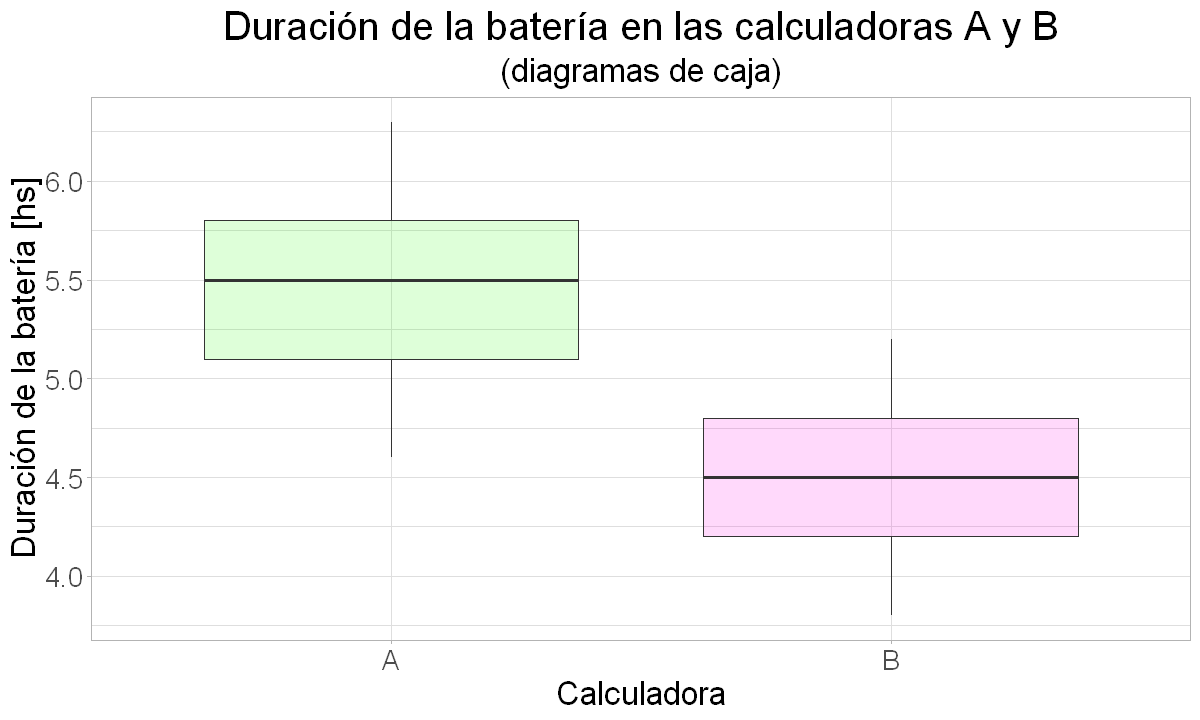

In [370]:
# Plot
options(repr.plot.width=10, repr.plot.height=6)
data_6 %>% 
ggplot(aes(y=duracion_bateria, x=calculadora)) +
    labs(
        title="Duración de la batería en las calculadoras A y B",
        subtitle="(diagramas de caja)",
        x="Calculadora",
        y="Duración de la batería [hs]") +
    geom_boxplot(alpha=0.15, fill=c("#20ff03", "#ff03e6")) +
    theme_light() +
    theme(text=element_text(size=20),
         plot.title = element_text(size=24, hjust = 0.5),
         plot.subtitle = element_text(size=20, hjust = 0.5))


In [28]:
calculadora_A <- data_6[data_6$calculadora == 'A',]$duracion_bateria
calculadora_B <- data_6[data_6$calculadora == 'B',]$duracion_bateria

n1<-length(calculadora_A)
n2<-length(calculadora_B)

wilcox.test(calculadora_A,calculadora_B,alternative="greater",paired=FALSE, exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  calculadora_A and calculadora_B
W = 76, p-value = 0.0009935
alternative hypothesis: true location shift is greater than 0


<div style="text-align: justify">Como el valor p-valor de la prueba es menor a $0.01$, se rechaza la hipótesis nula y se concluye que la duración de la bateria de la calculadora A es mayor a la de la calculadora B.</div>

***
<br></br>

### **Ejercicio 7**

#### <div style="text-align: justify">La información siguiente se refiere a la concentración del isótopo radiactivo estroncio-90, obtenida en muestras de leche de cinco lecherías seleccionadas al azar en cuatro regiones diferentes.</div>

<table style="width: 50%">
    <thead>
        <tr style="font-size: larger">
            <th rowspan="2" style="text-align: center;">Región</th>
            <th colspan="5">Concentración del isótopo</th>
        </tr>
        <tr style="font-size: larger">
            <td style="text-align: center;">1</td>
            <td style="text-align: center;">2</td>
            <td style="text-align: center;">3</td>
            <td style="text-align: center;">4</td>
            <td style="text-align: center;">5</td>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style="text-align: center; vertical-align: middle; font-weight: bold; font-size: larger;">1</td>
            <td style="text-align: center; vertical-align: middle;">6.4</td>
            <td style="text-align: center; vertical-align: middle;">5.8</td>
            <td style="text-align: center; vertical-align: middle;">6.5</td>
            <td style="text-align: center; vertical-align: middle;">7.7</td>
            <td style="text-align: center; vertical-align: middle;">6.1</td>
        </tr>
        <tr>
            <td style="text-align: center; vertical-align: middle; font-weight: bold; font-size: larger;">2</td>
            <td style="text-align: center; vertical-align: middle;">7.1</td>
            <td style="text-align: center; vertical-align: middle;">9.9</td>
            <td style="text-align: center; vertical-align: middle;">11.2</td>
            <td style="text-align: center; vertical-align: middle;">10.5</td>
            <td style="text-align: center; vertical-align: middle;">8.8</td>
        </tr>
        <tr>
            <td style="text-align: center; vertical-align: middle; font-weight: bold; font-size: larger;">3</td>
            <td style="text-align: center; vertical-align: middle;">5.7</td>
            <td style="text-align: center; vertical-align: middle;">5.9</td>
            <td style="text-align: center; vertical-align: middle;">8.2</td>
            <td style="text-align: center; vertical-align: middle;">6.6</td>
            <td style="text-align: center; vertical-align: middle;">5.1</td>
        </tr>
        <tr>
            <td style="text-align: center; vertical-align: middle; font-weight: bold; font-size: larger;">4</td>
            <td style="text-align: center; vertical-align: middle;">9.5</td>
            <td style="text-align: center; vertical-align: middle;">12.1</td>
            <td style="text-align: center; vertical-align: middle;">10.3</td>
            <td style="text-align: center; vertical-align: middle;">12.4</td>
            <td style="text-align: center; vertical-align: middle;">11.7</td>
        </tr>
    </tbody>
</table>

#### <div style="text-align: justify">Pruebe al nivel 0.10 para ver si el promedio verdadero de la concentración de estroncio-90 difiere en al menos dos de las regiones.</div>

In [29]:
data_7 <- read.csv("./TP5_tables/data7.csv") # Leo los datos desde archivo .csv
data_7$region <- factor(data_7$region)


<div style="text-align: justify">Las hipótesis son:</div>

#### <div style="text-align: center">$$H_0\text{: }\mu_1 = \mu_2 = \mu_3 = \mu_4\text{ y }H_1\text{: al menos un par de  }\mu_i \text{ difiere entre sí}$$</div>

<div style="text-align: justify">donde $\mu_i$ es la media verdadera de concentración del isótopo en la región $i$.&emsp;&emsp;$i = 1, 2, 3, 4$</div>

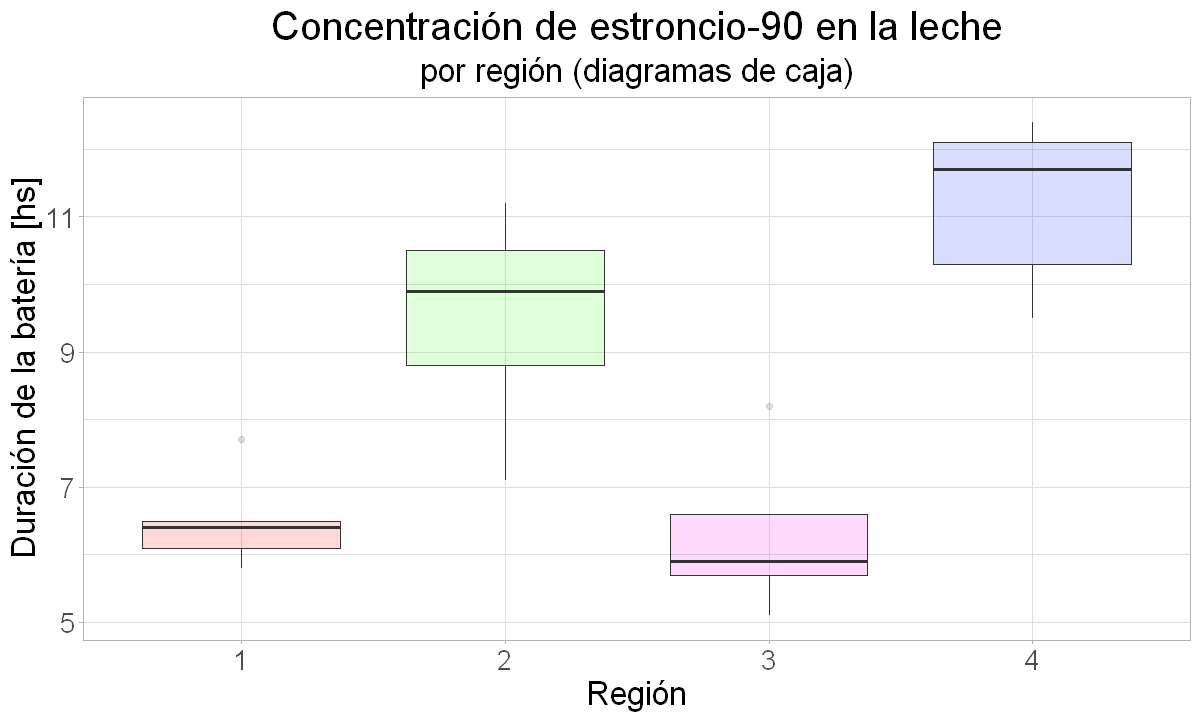

In [369]:
# Plot
options(repr.plot.width=10, repr.plot.height=6)
data_7 %>% 
ggplot(aes(y=concentracion_isotopo, x=region)) +
    labs(
        title="Concentración de estroncio-90 en la leche",
        subtitle="por región (diagramas de caja)",
        x="Región",
        y="Duración de la batería [hs]") +
    geom_boxplot(alpha=0.15, fill=c("#ff0303", "#20ff03", "#ff03e6", "#031cff")) +
    theme_light() +
    theme(text=element_text(size=20),
         plot.title = element_text(size=24, hjust = 0.5),
         plot.subtitle = element_text(size=20, hjust = 0.5))


In [30]:
kruskal.test(concentracion_isotopo ~ region, data_7)



	Kruskal-Wallis rank sum test

data:  concentracion_isotopo by region
Kruskal-Wallis chi-squared = 14.063, df = 3, p-value = 0.002821


<div style="text-align: justify">Como el valor p-valor de la prueba es menor a $0.01$, se rechaza la hipótesis nula y se concluye que la concentración del isótopo estroncio-90 difiere en al menos dos de las regiones estudiadas.</div>

***
<br></br>

### **Ejercicio 8**

#### <div style="text-align: justify">Se presentan los resultados de un experimento para comparar cuatro técnicas de mezclado diferentes sobre la resistencia a la tensión del cemento portland. ¿Existe algún indicador de que las técnicas de mezclado afectan la resistencia?. Utilice $\alpha = 0.05$.</div>

<table style="width: 50%">
    <thead>
        <tr style="font-size: larger">
            <th style="text-align: center;">Método</th>
            <th colspan="4">Resistencia $\left(lb/in^2\right)$</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style="text-align: center; vertical-align: middle; font-weight: bold; font-size: larger;">1</td>
            <td style="text-align: center; vertical-align: middle;">3129</td>
            <td style="text-align: center; vertical-align: middle;">3000</td>
            <td style="text-align: center; vertical-align: middle;">2865</td>
            <td style="text-align: center; vertical-align: middle;">2890</td>
        </tr>
        <tr>
            <td style="text-align: center; vertical-align: middle; font-weight: bold; font-size: larger;">2</td>
            <td style="text-align: center; vertical-align: middle;">3200</td>
            <td style="text-align: center; vertical-align: middle;">3000</td>
            <td style="text-align: center; vertical-align: middle;">2975</td>
            <td style="text-align: center; vertical-align: middle;">3150</td>
        </tr>
        <tr>
            <td style="text-align: center; vertical-align: middle; font-weight: bold; font-size: larger;">3</td>
            <td style="text-align: center; vertical-align: middle;">2800</td>
            <td style="text-align: center; vertical-align: middle;">2900</td>
            <td style="text-align: center; vertical-align: middle;">2985</td>
            <td style="text-align: center; vertical-align: middle;">3050</td>
        </tr>
        <tr>
            <td style="text-align: center; vertical-align: middle; font-weight: bold; font-size: larger;">4</td>
            <td style="text-align: center; vertical-align: middle;">2600</td>
            <td style="text-align: center; vertical-align: middle;">2700</td>
            <td style="text-align: center; vertical-align: middle;">2600</td>
            <td style="text-align: center; vertical-align: middle;">2765</td>
        </tr>
    </tbody>
</table>

In [33]:
data_8 <- read.csv("./TP5_tables/data8.csv") # Leo los datos desde archivo .csv
data_8$metodo <- factor(data_8$metodo)


<div style="text-align: justify">Las hipótesis son:</div>

#### <div style="text-align: center">$$H_0\text{: }\mu_1 = \mu_2 = \mu_3 = \mu_4\text{ y }H_1\text{: al menos un par de  }\mu_i \text{ difiere entre sí}$$</div>

<div style="text-align: justify">siendo $\mu_i$ la media verdadera de resistencia a la tensión obtenida con el método $i$.&emsp;&emsp;$i = 1, 2, 3, 4$</div>

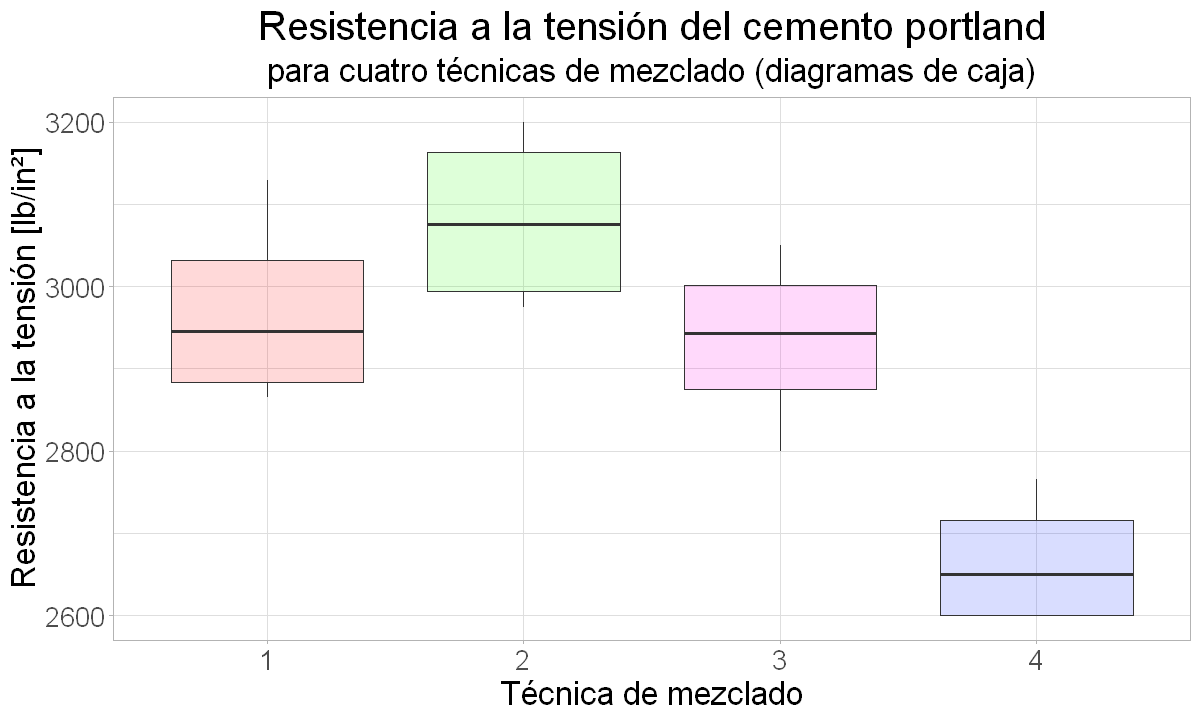

In [368]:
# Plot
options(repr.plot.width=10, repr.plot.height=6)
data_8 %>% 
ggplot(aes(y=resistencia, x=metodo)) +
    labs(
        title="Resistencia a la tensión del cemento portland",
        subtitle="para cuatro técnicas de mezclado (diagramas de caja)",
        x="Técnica de mezclado",
        y="Resistencia a la tensión [lb/in²]") +
    geom_boxplot(alpha=0.15, fill=c("#ff0303", "#20ff03", "#ff03e6", "#031cff")) +
    theme_light() +
    theme(text=element_text(size=20),
         plot.title = element_text(size=24, hjust = 0.5),
         plot.subtitle = element_text(size=20, hjust = 0.5))


In [34]:
kruskal.test(resistencia ~ metodo, data_8)



	Kruskal-Wallis rank sum test

data:  resistencia by metodo
Kruskal-Wallis chi-squared = 10.028, df = 3, p-value = 0.01833


<div style="text-align: justify">Como el valor p-valor de la prueba es menor a $0.05$, se rechaza la hipótesis nula y se concluye que las técnicas de mezclado afectan la resistencia.</div>

***
<br></br>